# Data Visualization Project
## Podcast Dataset
### By Alhanoof Alnajashi
Podcast dataset is chosen since its very trending these days and people love to know more about them and it can't be better than data in visual! 

Srource of the data <a href='https://www.kaggle.com/listennotes/all-podcast-episodes-published-in-december-2017?select=podcasts.csv'> Here </a> This dataset includes the metadata of (almost) all podcast episodes that were published in December 2017.

#### Information about the data set: <br> 
it has to CSV file podcast.csv and episodes.csv <br>
#### in podcast.csv there are 9 attributes <br>
uuid : is the podcast id in the <a href = 'https://www.listennotes.com'>ListenNotes.com</a>.<br>
title: Podcast title.<br>
image: The image of this podcast.<br>
description: Podcast description, in HTML format.<br>
language: Language of this podcast.<br>
categories: Genres of this podcast.<br>
website: Website of this podcast.<br>
author: The publisher of this podcast.<br>
itunes_id: iTunes id of this podcast.<br>
#### in episodes.csv there are 7 attributes <br>
title: Episode title. <br>
audio: Audio url. <br>
audio_length: Audio length in seconds. <br>
description: Episode description. <br>
pub_date: Published date of this podcast. <br>
uuid: is the episode id in the <a href = 'https://www.listennotes.com'>ListenNotes.com</a>. <br>
podcast_uuid: uuid of the podcast that contains this episode. <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
podcasts = pd.read_csv('podcasts.csv')
podcasts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121175 entries, 0 to 121174
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uuid         121175 non-null  object
 1   title        121173 non-null  object
 2   image        121175 non-null  object
 3   description  119832 non-null  object
 4   language     121175 non-null  object
 5   categories   121175 non-null  object
 6   website      120005 non-null  object
 7   author       118678 non-null  object
 8   itunes_id    121175 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 8.3+ MB


In [3]:
podcasts.sample(5)

,uuid,title,image,description,language,categories,website,author,itunes_id
39164,ccfbab0c15d244488028c365c14723b0,HellaBlackHellaSeattle,http://is5.mzstatic.com/image/thumb/Music71/v4...,A podcast creating community for people of col...,English,Society & Culture,http://soundcloud.com/hellablackhellaseattle,HellaBlackHellaSeattle,1109523675
61511,6caa343dfd4342ebbf15524a66c25ba1,Grace Hill Church,http://is1.mzstatic.com/image/thumb/Music62/v4...,Enjoy expository preaching and the proclamatio...,English,Religion & Spirituality | Christianity,http://gracehill.church,Grace Hill Church,959455569
66361,90eb462d002f43b8ac8107a88198b893,パンローリング presents キラメキの発想～投資戦略ラジオ～,http://is4.mzstatic.com/image/thumb/Music71/v4...,トレーダーの支持を集める出版社パンローリングが、ラジオNIKKEIと共に送るホットな投資情報...,Japanese,Business | Investing,http://market.radionikkei.jp/kirameki/,NIKKEI RADIO BROADCASTING CORPORATION,955754180
75724,a1336745ce2040169f5c75f16a1e8536,2 Guys 1 Canuck,http://is1.mzstatic.com/image/thumb/Music62/v4...,"Comedy and vulgarity a GO-GO\nThe random, hila...",English,Comedy,http://twoguysonecanuck.podbean.com,Shedless Productions,1109159990
72320,b437088507a04feb9079b402976c2bdc,The JTrain Podcast,http://is2.mzstatic.com/image/thumb/Music122/v...,The JTrain Podcast is hosted by comic Jared Fr...,English,Comedy,http://soundcloud.com/tfm-podcast,Jared Freid,672249013


In [4]:
episodes = pd.read_csv('episodes.csv')
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881046 entries, 0 to 881045
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         880842 non-null  object
 1   audio         869498 non-null  object
 2   audio_length  881046 non-null  int64 
 3   description   792720 non-null  object
 4   pub_date      881046 non-null  object
 5   uuid          881046 non-null  object
 6   podcast_uuid  881046 non-null  object
dtypes: int64(1), object(6)
memory usage: 47.1+ MB


In [5]:
podcasts.author.value_counts()

Radio France               1155
Audioboom                   917
BBC                         295
Radio.com                   230
audioBoom                   227
                           ... 
AL.com                        1
Robert Nordberg               1
Liliana Velásquez             1
Don Cousins                   1
Armchair Ultras Podcast       1
Name: author, Length: 94319, dtype: int64

### Data Wrangling

#### It better to work with one dataset, so the two datasets can be Merge via podcast_uuid from episodes data frame with uuid from padcast dataframe.

In [6]:
podcasts_clean = podcasts.copy()
episodes_clean = episodes.copy()

In [7]:
#Rename the variables
podcasts_clean = podcasts_clean.rename(columns={'uuid' :'id'})
episodes_clean = episodes_clean.rename(columns={'podcast_uuid' :'id'})

In [8]:
podcasts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121175 entries, 0 to 121174
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           121175 non-null  object
 1   title        121173 non-null  object
 2   image        121175 non-null  object
 3   description  119832 non-null  object
 4   language     121175 non-null  object
 5   categories   121175 non-null  object
 6   website      120005 non-null  object
 7   author       118678 non-null  object
 8   itunes_id    121175 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 8.3+ MB


In [9]:
episodes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881046 entries, 0 to 881045
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         880842 non-null  object
 1   audio         869498 non-null  object
 2   audio_length  881046 non-null  int64 
 3   description   792720 non-null  object
 4   pub_date      881046 non-null  object
 5   uuid          881046 non-null  object
 6   id            881046 non-null  object
dtypes: int64(1), object(6)
memory usage: 47.1+ MB


In [10]:
Podcast = pd.merge(podcasts_clean, episodes_clean, 
                   on=['id'], how='left')

In [11]:
Podcast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873820 entries, 0 to 873819
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             873820 non-null  object
 1   title_x        873814 non-null  object
 2   image          873820 non-null  object
 3   description_x  862268 non-null  object
 4   language       873820 non-null  object
 5   categories     873820 non-null  object
 6   website        862930 non-null  object
 7   author         856612 non-null  object
 8   itunes_id      873820 non-null  int64 
 9   title_y        873618 non-null  object
 10  audio          863045 non-null  object
 11  audio_length   873820 non-null  int64 
 12  description_y  787292 non-null  object
 13  pub_date       873820 non-null  object
 14  uuid           873820 non-null  object
dtypes: int64(2), object(13)
memory usage: 106.7+ MB


In [12]:
Podcast.sample()

,id,title_x,image,description_x,language,categories,website,author,itunes_id,title_y,audio,audio_length,description_y,pub_date,uuid
197880,76b5a3d821904f3a81442498ef399f52,Le journal de France Bleu Limousin,http://is3.mzstatic.com/image/thumb/Music62/v4...,"Toute l'actualité du Limousin, et vue du Limousin",French,News & Politics,http://www.radiofrance.fr/,Radio France,1041703862,Les infos de 08h00,http://rf.proxycast.org/1374488813056827393/15...,482,durée : 00:08:02 - Le journal de France Bleu L...,2017-12-04 07:00:00+00,27233505e5cd433c949b9169ff395605


In [13]:
#Rename some variables to be meaningful
Podcast = Podcast.rename(columns={'title_x' :'podcast_title',
                                  'description_x' : 'description_pod',
                                   'title_y' : 'episode_title',
                                    'description_y' : 'description_epi',
                                      'uuid' : 'website_id'})

In [14]:
Podcast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873820 entries, 0 to 873819
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               873820 non-null  object
 1   podcast_title    873814 non-null  object
 2   image            873820 non-null  object
 3   description_pod  862268 non-null  object
 4   language         873820 non-null  object
 5   categories       873820 non-null  object
 6   website          862930 non-null  object
 7   author           856612 non-null  object
 8   itunes_id        873820 non-null  int64 
 9   episode_title    873618 non-null  object
 10  audio            863045 non-null  object
 11  audio_length     873820 non-null  int64 
 12  description_epi  787292 non-null  object
 13  pub_date         873820 non-null  object
 14  website_id       873820 non-null  object
dtypes: int64(2), object(13)
memory usage: 106.7+ MB


In [15]:
#Change date type
Podcast['pub_date']=pd.to_datetime(Podcast['pub_date'])
Podcast['pub_date']

0        2017-12-12 12:45:27+00:00
1        2017-12-11 00:00:00+00:00
2        2017-12-19 00:00:00+00:00
3        2017-12-01 07:00:00+00:00
4        2017-12-08 07:00:00+00:00
                    ...           
873815   2017-12-12 22:01:15+00:00
873816   2017-12-12 04:11:12+00:00
873817   2017-12-11 05:19:43+00:00
873818   2017-12-03 22:06:50+00:00
873819   2017-12-03 22:00:31+00:00
Name: pub_date, Length: 873820, dtype: datetime64[ns, UTC]

In [16]:
Podcast.describe()

,itunes_id,audio_length
count,8.738200e+05,8.738200e+05
mean,9.003002e+08,1.709753e+04
std,3.810184e+08,4.622710e+06
min,7.332927e+07,-6.245000e+03
25%,5.196339e+08,5.620000e+02
50%,1.054958e+09,1.800000e+03
75%,1.223007e+09,3.062000e+03
max,1.341143e+09,2.082864e+09


In [17]:
Podcast['audio_length'].describe()

count    8.738200e+05
mean     1.709753e+04
std      4.622710e+06
min     -6.245000e+03
25%      5.620000e+02
50%      1.800000e+03
75%      3.062000e+03
max      2.082864e+09
Name: audio_length, dtype: float64

>#### Convert audio length from seconds to minutes by dividxing them by 60.

In [18]:
Podcast['audio_length'] = Podcast['audio_length'] // 60

In [19]:
Podcast['audio_length']

0         21
1         66
2         31
3         74
4         55
          ..
873815    18
873816     5
873817     6
873818     5
873819     3
Name: audio_length, Length: 873820, dtype: int64

>#### Some values need to be dropped since it does not make sense where the length of the audio is less than 1.

In [20]:
Check_length = Podcast[Podcast['audio_length']<= 0].index
Check_length

Int64Index([   197,    203,    211,    269,    270,    271,    272,    273,
               274,    275,
            ...
            873495, 873622, 873623, 873628, 873669, 873671, 873672, 873673,
            873688, 873812],
           dtype='int64', length=40318)

In [21]:
Podcast['audio_length'].describe()


count    8.738200e+05
mean     2.845596e+02
std      7.704516e+04
min     -1.050000e+02
25%      9.000000e+00
50%      3.000000e+01
75%      5.100000e+01
max      3.471440e+07
Name: audio_length, dtype: float64

In [22]:
Podcast.drop(Check_length , inplace=True)
Podcast['audio_length'].describe()

count    8.335020e+05
mean     2.983244e+02
std      7.888654e+04
min      1.000000e+00
25%      1.100000e+01
50%      3.100000e+01
75%      5.200000e+01
max      3.471440e+07
Name: audio_length, dtype: float64

>##### Also well drop any podcast that have 10 min or less.

In [23]:
check_audio = Podcast[Podcast['audio_length'] <= 10].index
check_audio

Int64Index([     8,      9,     10,     94,     95,     96,     97,     98,
                99,    100,
            ...
            873794, 873795, 873796, 873797, 873798, 873799, 873816, 873817,
            873818, 873819],
           dtype='int64', length=204419)

In [24]:
Podcast.drop(check_audio , inplace=True)
Podcast['audio_length'].value_counts()

60        18762
30        15226
28        14033
29        13455
39        11956
          ...  
396776        1
2344          1
2328          1
792           1
513           1
Name: audio_length, Length: 500, dtype: int64

>#### Huge number of the podcasts in the English will affect the analysis, I will sperate the dataset based on the languages English_Podcasts will contain all the podcast in the English and Podcast data frame will have the reset.

In [25]:
##Save new dataframe for english podcasts
English_Podcasts = Podcast[Podcast['language']== 'English']
English_Podcasts.sample()

,id,podcast_title,image,description_pod,language,categories,website,author,itunes_id,episode_title,audio,audio_length,description_epi,pub_date,website_id
372955,8d1b4bb7c8a4480aa1b4070e362da7b6,Filmstudy with Ken McKusick - Baltimore Ravens...,http://is3.mzstatic.com/image/thumb/Music118/v...,Ken McKusick from Russell Street Report and Jo...,English,Podcasting | Technology,https://audioboom.com/channels/4924154,Audioboom,1273569463,35: FilmStudy 2017 Episode 35 : A Win Is A Win,https://audioboom.com/posts/6570719.mp3?source...,58,NaN,2017-12-28 03:29:10+00:00,23af5b234e674414a02932a69c0f5b47


In [26]:
English_Podcasts.to_csv('English_Podcasts.csv', index=False)

In [27]:
#Drop english podcasts
Check_English = Podcast[Podcast['language']== 'English'].index

In [28]:
Podcast.drop(Check_English , inplace=True)

>#### Drop any language have less than 100 podcasts since it will not make a big change while all my analysis in the top of the podcats.

In [29]:
Slovak = Podcast[Podcast['language']== 'Slovak'].index
Bulgarian = Podcast[Podcast['language']== 'Bulgarian'].index
Icelandic = Podcast[Podcast['language']== 'Icelandic'].index
Croatian = Podcast[Podcast['language']== 'Croatian'].index
Afrikaans = Podcast[Podcast['language']== 'Afrikaans'].index
Abkhazian = Podcast[Podcast['language']== 'Abkhazian'].index
Afar = Podcast[Podcast['language']== 'Afar'].index
Macedonian = Podcast[Podcast['language']== 'Macedonian'].index
Belarusian = Podcast[Podcast['language']== 'Belarusian'].index
Irish = Podcast[Podcast['language']== 'Irish'].index
Norwegian = Podcast[Podcast['language']== 'Norwegian Bokmål'].index
Faeroese = Podcast[Podcast['language']== 'Faeroese'].index

In [30]:
Podcast.drop(Slovak , inplace=True)
Podcast.drop(Bulgarian , inplace=True)
Podcast.drop(Icelandic , inplace=True)
Podcast.drop(Croatian , inplace=True)
Podcast.drop(Afrikaans , inplace=True)
Podcast.drop(Abkhazian , inplace=True)
Podcast.drop(Afar , inplace=True)
Podcast.drop(Macedonian , inplace=True)
Podcast.drop(Belarusian , inplace=True)
Podcast.drop(Irish , inplace=True)
Podcast.drop(Norwegian , inplace=True)
Podcast.drop(Faeroese , inplace=True)

In [31]:
Podcast['language'].value_counts()

Spanish       24929
French        20792
German        14206
Italian        8417
Chinese        7316
Portuguese     6837
Russian        5977
Swedish        4946
Japanese       3988
Korean         3149
Dutch          2471
Catalan        2050
Czech          1489
Norwegian      1441
Danish         1184
Turkish         951
Estonian        826
Polish          726
Finnish         538
Ukranian        486
Hungarian       379
Slovenian       352
Galician        333
Swahili         303
Indonesian      127
Albanian        118
Greek           106
Basque          100
Romanian         73
Serbian          63
Name: language, dtype: int64

>#### Drop unneeded attributes and null values.

In [32]:
Podcast.drop(['image','website_id','itunes_id','pub_date'], axis=1, inplace=True)

In [33]:
Podcast = Podcast.dropna()

In [34]:
Podcast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100391 entries, 21899 to 873815
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               100391 non-null  object
 1   podcast_title    100391 non-null  object
 2   description_pod  100391 non-null  object
 3   language         100391 non-null  object
 4   categories       100391 non-null  object
 5   website          100391 non-null  object
 6   author           100391 non-null  object
 7   episode_title    100391 non-null  object
 8   audio            100391 non-null  object
 9   audio_length     100391 non-null  int64 
 10  description_epi  100391 non-null  object
dtypes: int64(1), object(10)
memory usage: 9.2+ MB


### Question to be asked
* Which the most categories that have the longest audio length?
* Which categories are the most trending in English_Podcasts?
* What is the language that have almost all categories?
* What is the average minute's length of the podcasts?
* What are the most listening language?


### Data Visualization
### Univariate Exploration

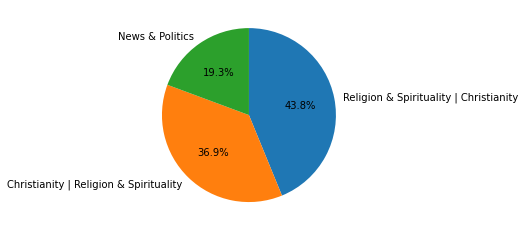

In [35]:
Category = English_Podcasts['categories'].value_counts()[0:3]
plt.pie(Category, labels = Category.index, startangle = 90, autopct='%1.1f%%',counterclock = False);

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I take the fist top 3 categories , where there are alot of categories in the data set.<br>
And we can see that (Religion & Spirituality | Christianity)

### Bivariate Exploration

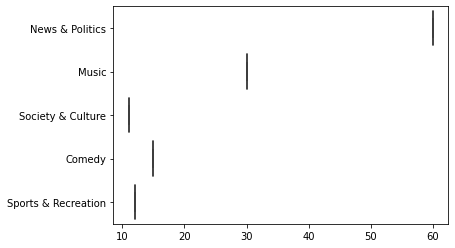

In [36]:
Ca = Podcast['categories'].value_counts()[0:5]
Le = Podcast['audio_length'].value_counts()[0:5]
sb.boxplot(data = Podcast, y = Ca.index, x = Le.index);

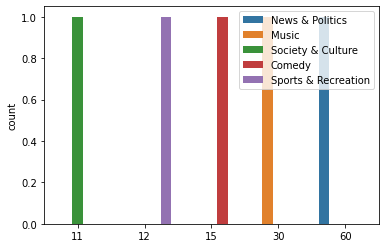

In [37]:
lan = Podcast['audio_length'].value_counts()[0:5]
cat = Podcast['categories'].value_counts()[0:5]
sb.countplot(data = Podcast, x = lan.index , hue = cat.index );

> The correlation between the categories and audio_length in the top five of the podcasts

### Multivariate Exploration

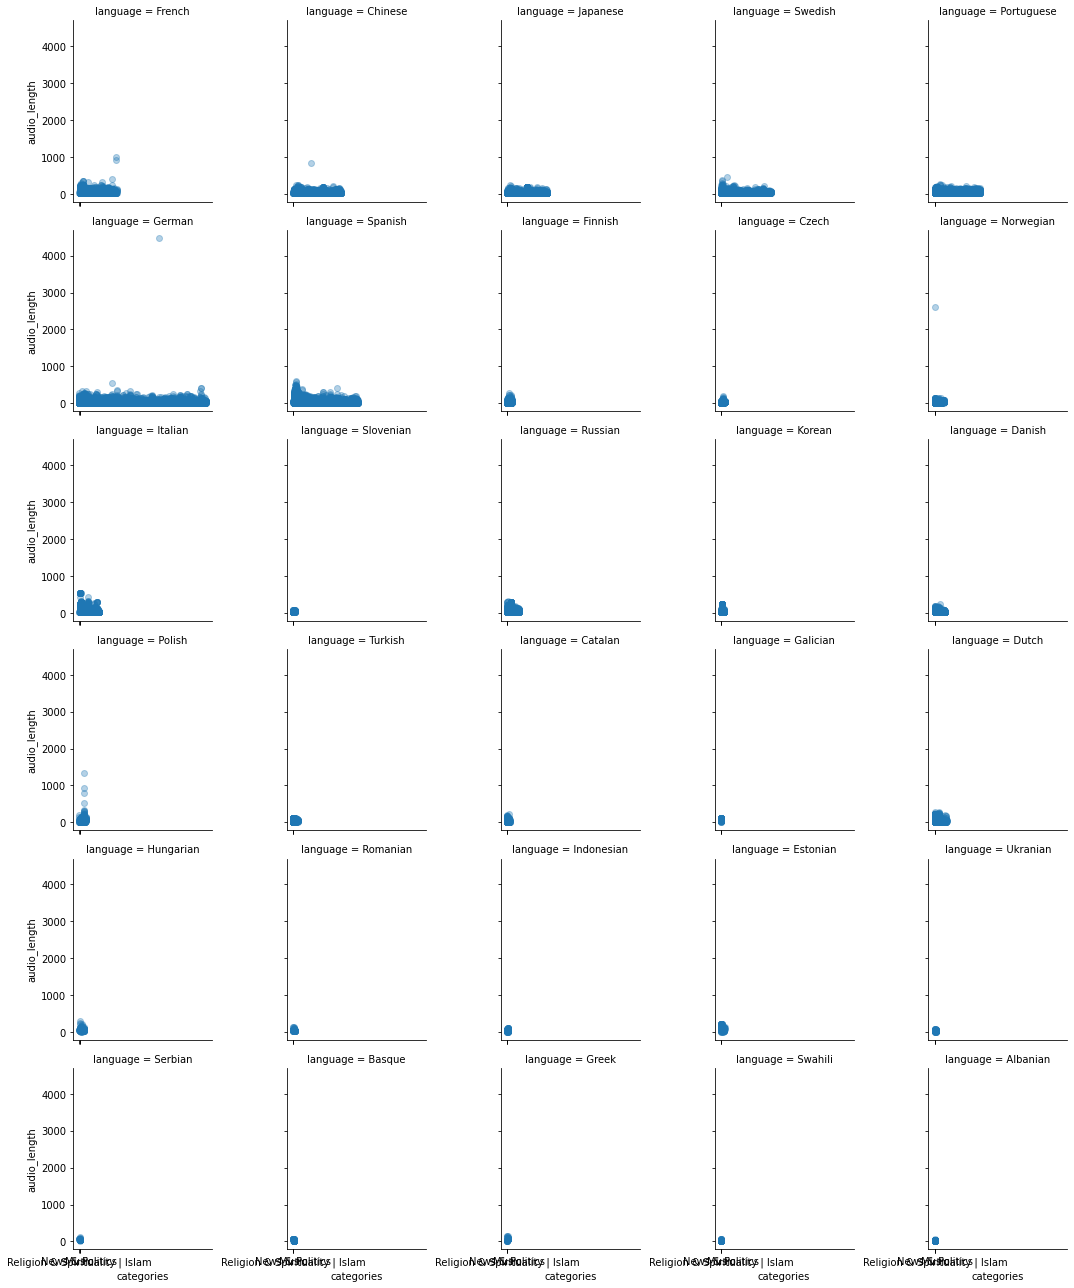

In [38]:
g = sb.FacetGrid(data = Podcast, col = 'language', height = 3, col_wrap = 5)
g.map(plt.scatter, 'categories', 'audio_length', alpha = 1/3);

> We can get from the visualization that the German podcasts have variety in the categories rather than any languages.